# Analysis of Hotel booking demand

### Content
+ Introduction: Hotel booking demand
+ Data Description
+ Formulation of research question
+ Data Preparation

## 1. Introduction: Hotel booking demand

A hotel booking demand is a complex software tool that schedules the dates and length of stay for guests as well as takes payment from them.
It enables them to choose their rooms at the time of booking, and more advanced systems even allow customers to select extras such as wine, flowers, fruit or other niceties to be placed in their room at the time of arrival (or later).

A reservation system, though it might sound like a tool used at the reception desk, is actually an online piece of software that enables guests to book their own stays online and pay for them using a secure portal.
That way, they can complete the transaction quickly, efficiently from the comfort of their own office or living room.


Source (https://www.siteminder.com/r/technology/hotel-cloud-technology/why-reservation-system-important-hotel/)

# 2. Data Description

Based on the data that I have, I want to know how many people use booking system, and also want to know countity of customers per year/month/day/night and also at which time more customers.

+ hotel-Hotel (H1 = Resort Hotel or H2 = City Hotel)
+ is_canceled-Value indicating if the booking was canceled (1) or not (0)
+ lead_time-Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
+ arrival_date_year-Year of arrival date
+ arrival_date_month-Month of arrival date
+ arrival_date_week_number-Week number of year for arrival date
+ arrival_date_day_of_month-Day of arrival date
+ stays_in_weekend_nights-Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
+ stays_in_week_nights-Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
+ adults-Number of adults
+ children-Number of children
+ babies-Number of babies
+ meal-Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal
+ country-Country of origin. Categories are represented in the ISO 3155–3:2013 format
+ market_segment-Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
+ distribution_channel-Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
+ is_repeated_guest-Value indicating if the booking name was from a repeated guest (1) or not (0)
+ previous_cancellations-Number of previous bookings that were cancelled by the customer prior to the current booking
+ previous_bookings_not_canceled-Number of previous bookings not cancelled by the customer prior to the current booking
+ reserved_room_type-Code of room type reserved. Code is presented instead of designation for anonymity reasons.
+ assigned_room_type-Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
+ booking_changes-Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
+ deposit_type-Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
+ agent-ID of the travel agency that made the booking
+ company-ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
+ days_in_waiting_list-Number of days the booking was in the waiting list before it was confirmed to the customer
+ customer_type-Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
+ adr-Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
+ required_car_parking_spaces-required_car_parking_spaces
+ total_of_special_requests-Number of special requests made by the customer (e.g. twin bed or high floor)
+ reservation_status-Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
+ reservation_status_date-Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

# 3. Research questions

For this project, data analysis and visualization contains 5 parts:
1. Analyze hotel booking service by period of time
2. Analyze the proportion of different customer types in hotel booking service
3. Analyze the most frequently used hotel part
4. Analyze in which part of 24 hours more booking rooms
5. Analyze how many people get car parking space

# 4. Data preparation

In [32]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from plotly.offline import iplot
from bs4 import BeautifulSoup

In [33]:
hp_file = open(file='hotel_bookings.csv', mode='r')

In [35]:
hotel = pd.read_csv('hotel_bookings.csv')

In [36]:
df = pd.DataFrame(hotel)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.dropna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,...,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,...,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,...,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,...,No Deposit,9.0,478.0,0,Transient-Party,150.0,0,1,Check-Out,2017-05-25
113046,City Hotel,0,13,2017,May,22,29,1,3,1,...,No Deposit,290.0,148.0,0,Transient,95.0,0,0,Check-Out,2017-06-02
113082,City Hotel,0,13,2017,May,22,29,1,3,2,...,No Deposit,290.0,148.0,0,Transient,110.0,0,0,Check-Out,2017-06-02
113627,City Hotel,0,210,2017,June,23,9,0,1,2,...,No Deposit,14.0,229.0,0,Transient,135.0,0,0,Check-Out,2017-06-10


In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# 5. Data visualization

## 5.1 Analyze hotel booking service usage by period of time

In [23]:
# number of reservations per month
df = pd.DataFrame(hotel)
time_per = df.groupby('arrival_date_month')['reservation_status_date'].nunique().sort_values()
time_per

arrival_date_month
November     265
January      273
February     283
March        341
December     345
October      359
September    392
April        422
May          476
June         501
July         698
August       722
Name: reservation_status_date, dtype: int64

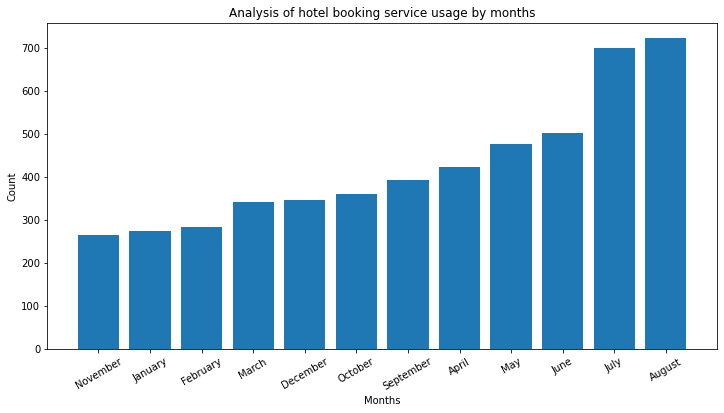

In [24]:
# The barplot of analysis of hotel booking service by months
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.bar(time_per.index, time_per)
plt.title('Analysis of hotel booking service usage by months')
plt.xlabel('Months')
plt.xticks(rotation=30)
plt.ylabel('Count')
plt.show()

The highest number of reservations are made in August and July (both up to 700). The least number is in November. 

## 5.2 Analyze the proportion of different customer types in hotel booking service

In [25]:
# there are 119389 records in customer_type column 
df = pd.DataFrame(hotel)
df = df["customer_type"]
df

0         Transient
1         Transient
2         Transient
3         Transient
4         Transient
            ...    
119385    Transient
119386    Transient
119387    Transient
119388    Transient
119389    Transient
Name: customer_type, Length: 119390, dtype: object

In [26]:
# describe column customer_type
df.describe()

count        119390
unique            4
top       Transient
freq          89613
Name: customer_type, dtype: object

In [27]:
# unique values of customer_type
df.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [29]:
from plotly.offline import iplot

values = df.value_counts().values 
labels = df.value_counts().index

figure = {"data": [{"values": values, "labels": labels, "domain": {"x": [0, .5]}, "hoverinfo":"label+percent", "type": "pie"}], 
          "layout": {"title":"The analysis of the customer types in hotel booking service"}}
iplot(figure)

From this pie chart, it's clearly that the majority of customers are customers with transient type (75.1%), while other transiet-party customers have a total of 21%. In comparison, contract and groip customers are quite rare and take less than 5% (3.41% - contract and 0.5% - group)